In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

/home/adrian/anaconda3/envs/testEnvironment/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/adrian/anaconda3/envs/testEnvironment/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
reviews = pd.read_csv('winemag-data_first150k.csv', index_col = 0)

In [4]:
reviews.head(5)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


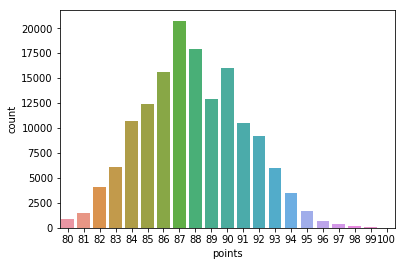

In [5]:
sns.countplot(reviews['points'])

#### seaborn uses kdeplot instead of the so called lineplot. The x axis is the variable being plotted while y is the frequency of that specific x value

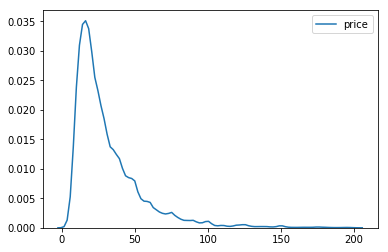

In [10]:
sns.kdeplot(reviews[reviews['price']<200].loc[:,'price'])

#### kdeplots can also be used for 2d bivariate plots. These are computationally expensive and might take time if the sample size is too big

/home/adrian/anaconda3/envs/testEnvironment/lib/python3.5/site-packages/seaborn/distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


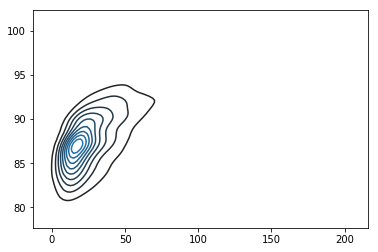

In [11]:
sns.kdeplot(reviews[reviews['price']<200].loc[:,['price','points']].dropna().sample(5000))

### Let's move on to the distplots / histograms

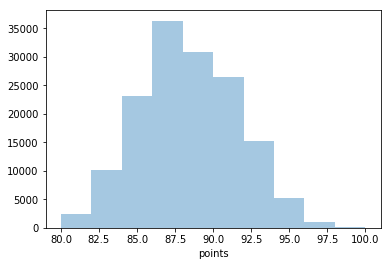

In [13]:
sns.distplot(reviews['points'], bins=10, kde=False)

### With seaborn it is possible to combine scatterplots and hexplots in a joint plot!! Tweak kind to alternate between the type of plots!

/home/adrian/anaconda3/envs/testEnvironment/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


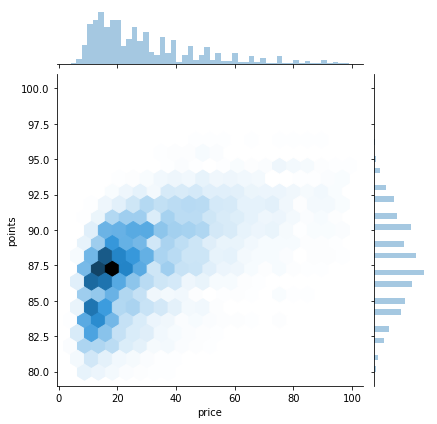

In [16]:
sns.jointplot(x='price', y='points', data=reviews[reviews['price']<100], kind='hex', gridsize=20)

### Boxplots and violin plots

In [26]:
top_5 = reviews['variety'].value_counts().head(5).index
df = reviews[reviews.variety.isin(top_5)]

 Boxplots shows the distribution of data points. The upper part of the box shows the 75th percentile while the bottom box shows the 25th percentile. Meaning that half of the data points are contained within the box! The line in the middle is the median. The "end points" on the end of each line are the extends of the points beyond the center of distribution. The point beyond these are outliers. Boxplots usually works very well for data sets with a lot of data points and should preferably be ca normally distributed


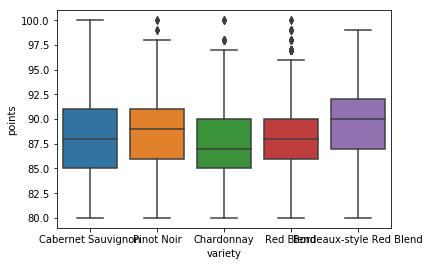

In [29]:
sns.boxplot(x='variety', y='points', data = df)

In [36]:
np.percentile(reviews[reviews['variety']=='Pinot Noir']['points'], [25,75])

array([86., 91.])

This fits well with the top and bottom line of the orange box being the same as the numpy calculated percentiles

#### Violinplots tells much of the same story as the box plot, but also shows where the density of the data points are the highest and how they vary. This is a more intuitive way as the kernel density is represented as an additional axis, instead of in terms of percentiles

/home/adrian/anaconda3/envs/testEnvironment/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


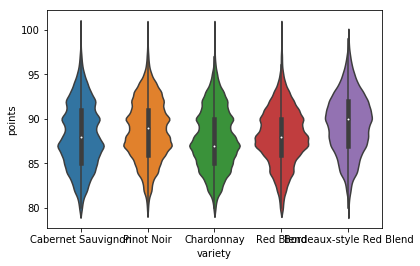

In [37]:
sns.violinplot(x = 'variety', y='points', data = reviews[reviews['variety'].isin(top_5)])

## Let's repeat some of the plotting methods on pokemon data

In [38]:
pokemon = pd.read_csv('Pokemon.csv', index_col=0)

In [39]:
pokemon.head(5)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [44]:
pokemon['Generation'].value_counts()

1    166
5    165
3    160
4    121
2    106
6     82
Name: Generation, dtype: int64

### bins (countplot)

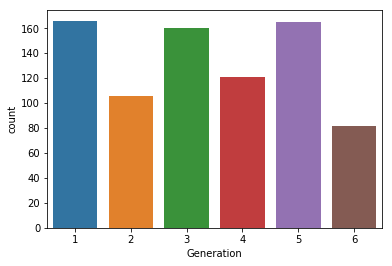

In [52]:
sns.countplot(pokemon['Generation'])

### histogram / distribution

/home/adrian/anaconda3/envs/testEnvironment/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


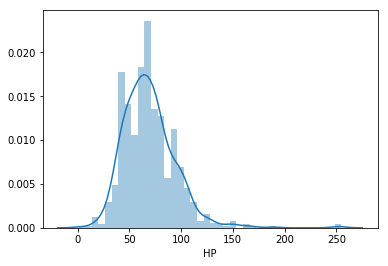

In [49]:
sns.distplot(pokemon['HP'])

### Trying out a scatter-plot with histograms for each axis

/home/adrian/anaconda3/envs/testEnvironment/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


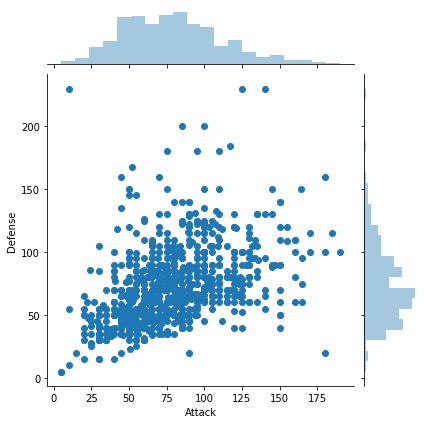

In [54]:
sns.jointplot(x = 'Attack', y= 'Defense', data = pokemon)

### Let's make the data a bit clearer by using a hex-plot to represent the density instead of scatter plot

/home/adrian/anaconda3/envs/testEnvironment/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


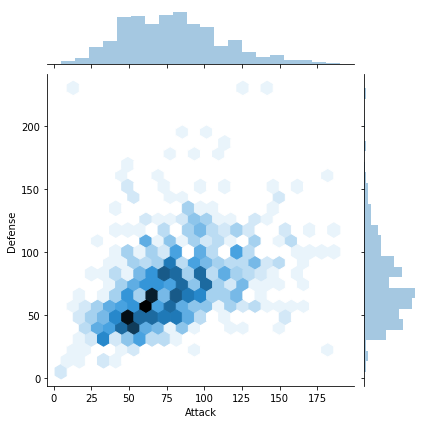

In [56]:
sns.jointplot(x='Attack', y = 'Defense', data=pokemon, kind='hex')

### kde-plot for bivariate analysis (instead of hex-plot etc) 

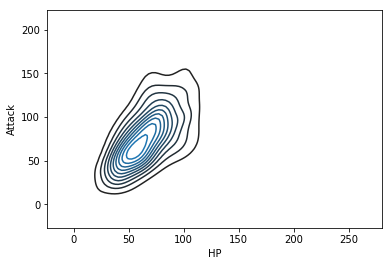

In [59]:
sns.kdeplot(pokemon['HP'],pokemon['Attack'])

### box plot to tell the attack of legendary pokemon

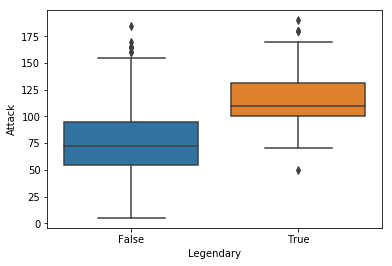

In [61]:
sns.boxplot(x = 'Legendary', y='Attack', data=pokemon)

### Let's do the same with a violin plot to get a better understanding of the Attack density

In [66]:
import warnings

In [70]:
warnings.filterwarnings('default')

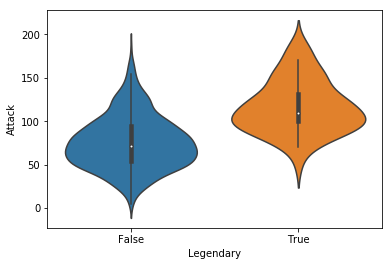

In [69]:
sns.violinplot(x='Legendary', y='Attack', data=pokemon)

In [74]:
corr = pokemon.corr().drop('Total', axis=0).drop('Total', axis=1)

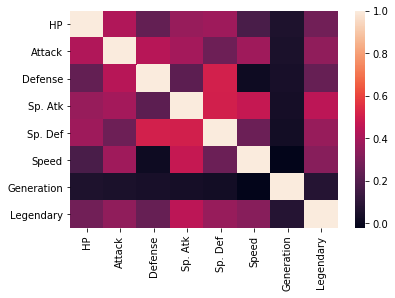

In [75]:
sns.heatmap(corr)